# ABOUT

This Project is prepared by

- Group Member 1 - Nur Damia Binti Rohisyam (Student ID - 1211304435)

- Group Member 2 - Faqihah Binti Zakir (Student ID - 1211303109)

- Group Member 3 - Muhammad Zafri Bin Marwan (Student ID - 1201101871)

Objective of Our Project

The objective of this lab is to predict housing price based on key factors like property type, furnishing status, location. 

We will also apply what we have learned in class, including Principal Component Analysis (PCA), Linear Regression, and Neural Networks, to develop and evaluate our predictive models.

Dataset Description

Link - https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data

The dataset consists of prices for various Malaysian condominiums, scraped from mudah.my, with 4000 rows and 32 columns describing the properties.

Now let's begin our project!

# DATA AND LIBRARY INSERTION 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('houses.csv')

In [3]:
df.head()

,description,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Ad List,Category,Facilities,Building Name,...,REN Number,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,Iconic Building @ KL SETAPAK\nNew launching & ...,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,98187451,"Apartment / Condominium, For sale",-,Kenwingston Platz,...,-,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,"FOR SALE @ RM250,000\nIntroduction:\n~ Pangsap...",3,2,980 sq.ft.,NaN,NaN,101683090,"Apartment / Condominium, For sale","Parking, Security, Swimming Pool, Playground, ...",Kenanga (Park View Court),...,REN 15862,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,"[Below Market] Sri Lavender Apartment,Tmn Sepa...",3,2,1000 sq.ft.,NaN,NaN,103792905,"Apartment / Condominium, For sale","Playground, Minimart, Jogging Track, Barbeque ...",Sri Lavender Apartment,...,-,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,Flat Pandan Indah\nJalan Pandan Indah 3/3\nNon...,3,1,592 sq.ft.,NaN,NaN,103806240,"Apartment / Condominium, For sale","Parking, Playground, Minimart, Jogging Track",Flat Pandan Indah,...,REN 16279,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,"* Open-concept Soho with balcony, unblock view...",1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,103806234,"Apartment / Condominium, For sale","Minimart, Gymnasium, Parking, Security",i-Soho @ i-City,...,-,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


# DATA PRE-PROCESSING

Data preprocessing involves preparing the raw data for analysis by transforming it into a clean and usable format. 

Dimensionality of the data

In [4]:
# check dimensionality
print("Number of rows:", df.shape[0])
print("Number of features/columns:", df.shape[1] )

Number of rows: 4000
Number of features/columns: 32


Checking the data type of each attribute shows that most columns/attributes are in (object) format, which means they are in string format. It's important to convert these data into numerical format by the end of the preprocessing phase, as Machine Learning Models require numerical inputs for training

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   description             4000 non-null   object
 1   Bedroom                 4000 non-null   object
 2   Bathroom                4000 non-null   object
 3   Property Size           4000 non-null   object
 4   Nearby School           687 non-null    object
 5   Nearby Mall             365 non-null    object
 6   Ad List                 4000 non-null   int64 
 7   Category                4000 non-null   object
 8   Facilities              4000 non-null   object
 9   Building Name           4000 non-null   object
 10  Developer               4000 non-null   object
 11  Tenure Type             4000 non-null   object
 12  Address                 4000 non-null   object
 13  Completion Year         4000 non-null   object
 14  # of Floors             4000 non-null   object
 15  Tota


Exploratory Data Analysis 

First, we look at the data to understand its patterns and characteristics. We check how different features like prices, property types, and locations are distributed and identify any unusual values or relationships between them.

In [6]:
#To identify categorical features
categorical_features = [ 'Tenure Type', 'Land Title', 'Property Type', 'Floor Range']

To Visualize the distribution for categorical columns

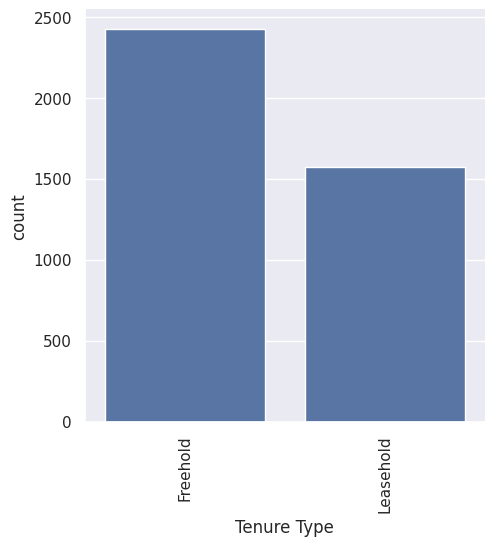

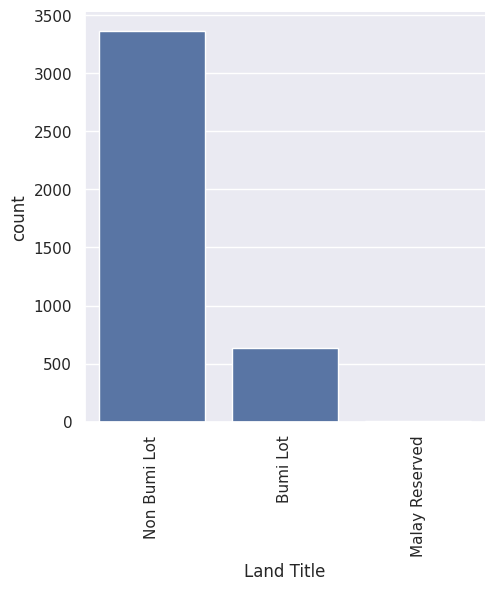

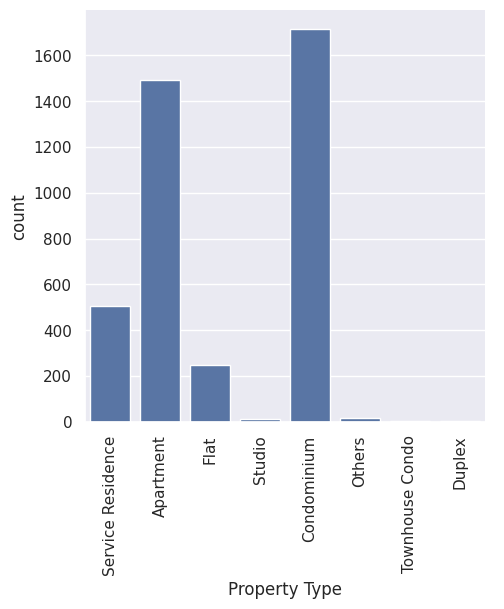

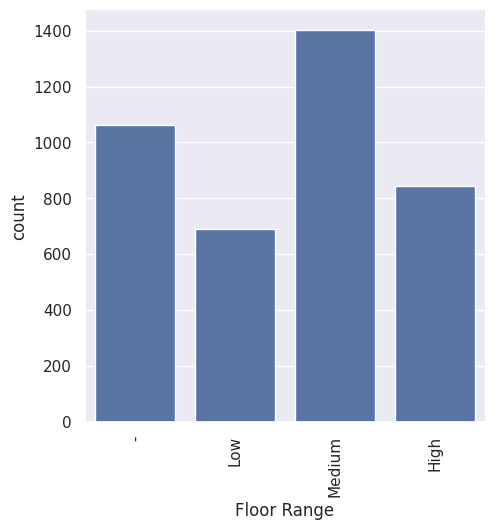

In [7]:
#To check distribution for categorical columns
for i in range(4):
  ax = sns.catplot(data=df,x=categorical_features[i],kind='count')
  ax.set_xticklabels(rotation=90)

Removing '-' values in dataset

Checking for '-' values in a housing dataset is important because it shows missing or unclear data, like houses without certain facilities or schools. If there are too many '-', it can make analysis hard, so we might modify it to keep the data reliable for better understanding and modeling.

In [8]:
print("Count for each column with - value")
column_mark_value_count_series=df.isin(['-']).sum(axis=0)
column_mark_value_count_series

Count for each column with - value


description                  0
Bedroom                      1
Bathroom                     1
Property Size                0
Nearby School                0
Nearby Mall                  0
Ad List                      0
Category                     0
Facilities                 641
Building Name               87
Developer                 1731
Tenure Type                  0
Address                     87
Completion Year           2021
# of Floors               1749
Total Units               1902
Property Type                0
Parking Lot               1219
Floor Range               1062
Land Title                   0
Firm Type                  548
Firm Number                548
REN Number                 833
Bus Stop                     0
Mall                         0
Park                         0
School                       0
Hospital                     0
price                        0
Highway                      0
Nearby Railway Station       0
Railway Station              0
dtype: i

In [9]:
# Drop columns with high percentage of '-' values and those not relevant to the prediction
columns_to_drop = ['description', 'Ad List','Facilities',
    'Firm Type', 'Firm Number', 'REN Number', 'Completion Year', 'Developer', 'Category'
]
df = df.drop(columns=columns_to_drop)

# Display remaining columns
print("Remaining columns after dropping irrelevant or highly missing columns:")
print(df.columns)

Remaining columns after dropping irrelevant or highly missing columns:
Index(['Bedroom', 'Bathroom', 'Property Size', 'Nearby School', 'Nearby Mall',
       'Building Name', 'Tenure Type', 'Address', '# of Floors', 'Total Units',
       'Property Type', 'Parking Lot', 'Floor Range', 'Land Title', 'Bus Stop',
       'Mall', 'Park', 'School', 'Hospital', 'price', 'Highway',
       'Nearby Railway Station', 'Railway Station'],
      dtype='object')


Then we replace all existence of '-' in the Data Frame df with NaN (Not a Number), which is a representation of missing or undefined data in pandas

In [10]:
df.replace('-', np.nan, inplace=True)

In [11]:
#columns_to_check = ['Bedroom', 'Bathroom', 'Address', 'Building Name']
# Drop rows with NaN in any of the specified columns
#df.dropna(subset=columns_to_check, inplace=True)

Handling Missing Data 

Now we want to ensure that missing data in these columns is replaced with meaningful values (median for numerical columns and 'Unknown' for categorical data), so that the dataset more complete and suitable for analysis or modeling tasks.

In [12]:
# To change data type:
df['# of Floors'] = pd.to_numeric(df['# of Floors'], errors='coerce')

In [13]:
# To check data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bedroom                 3999 non-null   object 
 1   Bathroom                3999 non-null   object 
 2   Property Size           4000 non-null   object 
 3   Nearby School           687 non-null    object 
 4   Nearby Mall             365 non-null    object 
 5   Building Name           3913 non-null   object 
 6   Tenure Type             4000 non-null   object 
 7   Address                 3913 non-null   object 
 8   # of Floors             2251 non-null   float64
 9   Total Units             2098 non-null   object 
 10  Property Type           4000 non-null   object 
 11  Parking Lot             2781 non-null   object 
 12  Floor Range             2938 non-null   object 
 13  Land Title              4000 non-null   object 
 14  Bus Stop                708 non-null    

In [14]:
df.head()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Building Name,Tenure Type,Address,# of Floors,Total Units,...,Land Title,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,Kenwingston Platz,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",NaN,NaN,...,Non Bumi Lot,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,3,2,980 sq.ft.,NaN,NaN,Kenanga (Park View Court),Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",NaN,NaN,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,3,2,1000 sq.ft.,NaN,NaN,Sri Lavender Apartment,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13.0,445,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,3,1,592 sq.ft.,NaN,NaN,Flat Pandan Indah,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",NaN,NaN,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,i-Soho @ i-City,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",43.0,956,...,Bumi Lot,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


In [15]:
# To handle missing Data:
df['# of Floors'].fillna(df['# of Floors'].median(), inplace=True)
df['Total Units'].fillna(df['Total Units'].median(), inplace=True)
df['Parking Lot'].fillna(df['Parking Lot'].median(), inplace=True)
df['Bedroom'].fillna(df['Bedroom'].median(), inplace=True)
df['Bathroom'].fillna(df['Bathroom'].median(), inplace=True)
df['Floor Range'].fillna('Unknown', inplace=True)

In [16]:
df.head()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Building Name,Tenure Type,Address,# of Floors,Total Units,...,Land Title,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,4,2,1000 sq.ft.,Sekolah Menengah Pendidikan Khas Cacat Penglih...,Setapak Central,Kenwingston Platz,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",20.0,462.0,...,Non Bumi Lot,Bus Stop Starparc Point\nBus Stop Setapak Cent...,Setapak Central,"Park at Taman Tasik Danau Kota, Setapak, Kuala...",Sekolah Menengah Pendidikan Khas Cacat Penglih...,Columbia Asia Hospital,RM 340 000,NaN,NaN,NaN
1,3,2,980 sq.ft.,NaN,NaN,Kenanga (Park View Court),Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",20.0,462.0,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,RM 250 000,NaN,NaN,NaN
2,3,2,1000 sq.ft.,NaN,NaN,Sri Lavender Apartment,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13.0,445,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,RM 230 000,SILK Sg Ramal (T) Toll Plaza,NaN,NaN
3,3,1,592 sq.ft.,NaN,NaN,Flat Pandan Indah,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",20.0,462.0,...,Non Bumi Lot,NaN,NaN,NaN,NaN,NaN,RM 158 000,NaN,NaN,NaN
4,1,1,467 sq.ft.,Sekolah Jenis Kebangsaan (T) Ladang Midlands,i-Soho i-City,i-Soho @ i-City,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",43.0,956,...,Bumi Lot,Bus Stop at Persiaran Permai 1\nBus Stop at Pe...,i-Soho i-City\nGulati\nCentral i-City Shopping...,"Park 2 at Section 7, Shah Alam\nPark 1 at Sect...",Sekolah Jenis Kebangsaan (T) Ladang Midlands\n...,Osel Clinic (Shah Alam)\nHospital Shah Alam,RM 305 000,NaN,NaN,NaN


Data Filtering 

In [17]:
# Filter rows where # of Floors is less than or equal to 400
# Filters the DataFrame df to include only rows where the # of Floors column has values less than or equal to 100. 
# This operation removes data points that may be outliers, focusing the analysis on more relevant data.
df = df[df['# of Floors'] <= 100]

# Check the number of rows after filtering
print("After filtering:", df.shape[0])

After filtering: 3993



To visualize the distribution of the # of Floors column after filtering to identify outliers 

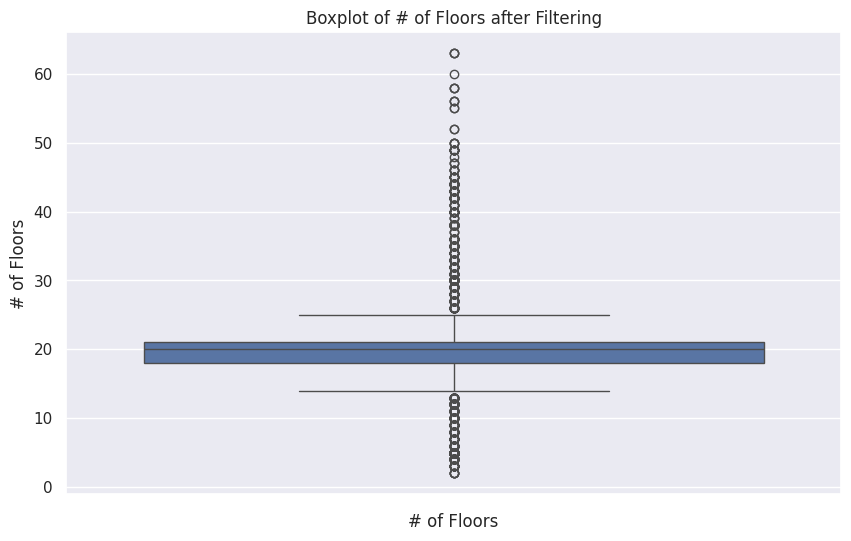

In [18]:
# Optionally, visualize the distribution after filtering
plt.figure(figsize=(10, 6))
sns.boxplot(df['# of Floors'])
plt.title('Boxplot of # of Floors after Filtering')
plt.xlabel('# of Floors')
plt.show()

Data Transformation

In [19]:
# check missing value first 
df.isna().sum()

Bedroom                      0
Bathroom                     0
Property Size                0
Nearby School             3307
Nearby Mall               3629
Building Name               87
Tenure Type                  0
Address                     87
# of Floors                  0
Total Units                  0
Property Type                0
Parking Lot                  0
Floor Range                  0
Land Title                   0
Bus Stop                  3291
Mall                      3520
Park                      3191
School                    3047
Hospital                  3654
price                        0
Highway                   3854
Nearby Railway Station    3632
Railway Station           3510
dtype: int64

The transformation converts categorical or presence-absence data into binary format (0 or 1). This format is often more suitable for machine learning algorithms that require numerical inputs. It also standardizes the representation of missing or undefined data ('-' or NaN) as 0.

In [20]:
# List of columns to transform
columns_to_transform = ['Highway', 'Nearby Railway Station', 'Railway Station', 'Bus Stop', 'Mall', 
                        'Park', 'School', 'Hospital', 'Nearby School', 'Nearby Mall']

# Create binary columns
for column in columns_to_transform:
    df[column] = df[column].apply(lambda x: 0 if pd.isna(x) or x == '-' else 1)

In [21]:
df.head()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,Building Name,Tenure Type,Address,# of Floors,Total Units,...,Land Title,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,4,2,1000 sq.ft.,1,1,Kenwingston Platz,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",20.0,462.0,...,Non Bumi Lot,1,1,1,1,1,RM 340 000,0,0,0
1,3,2,980 sq.ft.,0,0,Kenanga (Park View Court),Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",20.0,462.0,...,Non Bumi Lot,0,0,0,0,0,RM 250 000,0,0,0
2,3,2,1000 sq.ft.,0,0,Sri Lavender Apartment,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13.0,445,...,Non Bumi Lot,0,0,0,0,0,RM 230 000,1,0,0
3,3,1,592 sq.ft.,0,0,Flat Pandan Indah,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",20.0,462.0,...,Non Bumi Lot,0,0,0,0,0,RM 158 000,0,0,0
4,1,1,467 sq.ft.,1,1,i-Soho @ i-City,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",43.0,956,...,Bumi Lot,1,1,1,1,1,RM 305 000,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bedroom                 3993 non-null   object 
 1   Bathroom                3993 non-null   object 
 2   Property Size           3993 non-null   object 
 3   Nearby School           3993 non-null   int64  
 4   Nearby Mall             3993 non-null   int64  
 5   Building Name           3906 non-null   object 
 6   Tenure Type             3993 non-null   object 
 7   Address                 3906 non-null   object 
 8   # of Floors             3993 non-null   float64
 9   Total Units             3993 non-null   object 
 10  Property Type           3993 non-null   object 
 11  Parking Lot             3993 non-null   object 
 12  Floor Range             3993 non-null   object 
 13  Land Title              3993 non-null   object 
 14  Bus Stop                3993 non-null   int64

Here we convert address data into a more structured format (state names), making it easier to analyze.

In [23]:
def get_state(x):
    state_list = ["Johor", "Kedah", "Kelantan", "Kuala Lumpur", "Melaka", "Negeri Sembilan", 
                  'Penang', "Pahang", "Perak", "Perlis", "Pulau Pinang", "Sabah", "Sarawak", 
                  "Selangor", "Terengganu", "Labuan", "Putrajaya"]
    if pd.notnull(x):
        x_list = x.split(',')
        stripped = [s.strip(' ') for s in x_list]
        try:
            return list(set(state_list) & set(stripped))[0]
        except:
            return np.NaN
    else:
        return np.NaN

# Apply the function to get the state from each address
state = df['Address'].apply(get_state)

# Insert the 'State' column into your DataFrame
df.insert(1, 'State', state)

# Print the first few rows to verify the result
df.head()

,Bedroom,State,Bathroom,Property Size,Nearby School,Nearby Mall,Building Name,Tenure Type,Address,# of Floors,...,Land Title,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,4,Kuala Lumpur,2,1000 sq.ft.,1,1,Kenwingston Platz,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",20.0,...,Non Bumi Lot,1,1,1,1,1,RM 340 000,0,0,0
1,3,Melaka,2,980 sq.ft.,0,0,Kenanga (Park View Court),Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",20.0,...,Non Bumi Lot,0,0,0,0,0,RM 250 000,0,0,0
2,3,Selangor,2,1000 sq.ft.,0,0,Sri Lavender Apartment,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13.0,...,Non Bumi Lot,0,0,0,0,0,RM 230 000,1,0,0
3,3,Selangor,1,592 sq.ft.,0,0,Flat Pandan Indah,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",20.0,...,Non Bumi Lot,0,0,0,0,0,RM 158 000,0,0,0
4,1,Selangor,1,467 sq.ft.,1,1,i-Soho @ i-City,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",43.0,...,Bumi Lot,1,1,1,1,1,RM 305 000,0,0,0


In [24]:
# Clean price column and convert to numeric
df['price'] = df['price'].astype(str).str.replace('RM', '').str.replace(',', '').str.replace(' ', '').astype(float)

# Clean property size column and convert to numeric
df['Property Size'] = df['Property Size'].astype(str).str.replace(' sq.ft.', '').astype(float)

In [25]:
df.head()

,Bedroom,State,Bathroom,Property Size,Nearby School,Nearby Mall,Building Name,Tenure Type,Address,# of Floors,...,Land Title,Bus Stop,Mall,Park,School,Hospital,price,Highway,Nearby Railway Station,Railway Station
0,4,Kuala Lumpur,2,1000.0,1,1,Kenwingston Platz,Freehold,"Jalan Gombak, Setapak, Kuala Lumpur",20.0,...,Non Bumi Lot,1,1,1,1,1,340000.0,0,0,0
1,3,Melaka,2,980.0,0,0,Kenanga (Park View Court),Freehold,"Jalan Kenanga 3/8, Melaka City, Melaka",20.0,...,Non Bumi Lot,0,0,0,0,0,250000.0,0,0,0
2,3,Selangor,2,1000.0,0,0,Sri Lavender Apartment,Freehold,"Jalan Sepakat Indah 2/1, Taman Sepakat Indah 2...",13.0,...,Non Bumi Lot,0,0,0,0,0,230000.0,1,0,0
3,3,Selangor,1,592.0,0,0,Flat Pandan Indah,Leasehold,"jalan pandan indah 3/3, Selangor, Ampang",20.0,...,Non Bumi Lot,0,0,0,0,0,158000.0,0,0,0
4,1,Selangor,1,467.0,1,1,i-Soho @ i-City,Freehold,"Jalan Plumbum 7/102, Shah Alam, Selangor",43.0,...,Bumi Lot,1,1,1,1,1,305000.0,0,0,0


In [26]:
# Drop columns that won't be used as features
df.drop(columns=['Address', 'Building Name', 'Railway Station', 'Mall', 'School'], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bedroom                 3993 non-null   object 
 1   State                   3906 non-null   object 
 2   Bathroom                3993 non-null   object 
 3   Property Size           3993 non-null   float64
 4   Nearby School           3993 non-null   int64  
 5   Nearby Mall             3993 non-null   int64  
 6   Tenure Type             3993 non-null   object 
 7   # of Floors             3993 non-null   float64
 8   Total Units             3993 non-null   object 
 9   Property Type           3993 non-null   object 
 10  Parking Lot             3993 non-null   object 
 11  Floor Range             3993 non-null   object 
 12  Land Title              3993 non-null   object 
 13  Bus Stop                3993 non-null   int64  
 14  Park                    3993 non-null   int64

In [28]:
# Iterate over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()  # Add an empty line for clarity

Unique values in 'Bedroom':
['4' '3' '1' '2' '5' '6' 3.0 '10' '8']

Unique values in 'State':
['Kuala Lumpur' 'Melaka' 'Selangor' 'Penang' 'Johor' 'Sarawak' nan
 'Putrajaya' 'Perak' 'Negeri Sembilan' 'Sabah' 'Pahang' 'Terengganu'
 'Kelantan' 'Labuan' 'Kedah']

Unique values in 'Bathroom':
['2' '1' '3' '4' '5' 2.0 '6' '7' '8']

Unique values in 'Property Size':
[1.00000e+03 9.80000e+02 5.92000e+02 4.67000e+02 1.10000e+03 7.80000e+02
 8.52000e+02 9.18000e+02 6.60000e+02 1.24600e+03 5.50000e+02 1.25000e+03
 1.04800e+03 1.15000e+03 5.53000e+02 9.01000e+02 4.52000e+02 1.01600e+03
 9.00000e+02 6.50000e+02 1.18200e+03 8.72000e+02 4.50000e+02 1.00500e+03
 4.30000e+02 1.05000e+03 9.86000e+02 9.50000e+02 1.05500e+03 1.01700e+03
 1.38700e+03 7.20000e+02 1.47400e+03 7.88000e+02 5.17000e+02 8.50000e+02
 8.00000e+02 1.43200e+03 5.27000e+02 1.10800e+03 8.60000e+02 1.01100e+03
 9.25000e+02 7.53000e+02 1.09300e+03 1.40000e+03 9.53000e+02 7.50000e+02
 1.15200e+03 1.33400e+03 7.05000e+02 6.89000e+02 1.70


Encoding is necessary to convert categorical data, which cannot be directly used in machine learning algorithms, into numerical format.


In [29]:
from sklearn.preprocessing import LabelEncoder

# Drop rows where 'Floor Range' is NaN or missing
df = df.dropna(subset=['Floor Range'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Floor Range' column
df['Floor Range'] = label_encoder.fit_transform(df['Floor Range'])

# Print the mapping of original values to encoded values
print("Mapping of original values to encoded values:")
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {encoded}")

# Print first few rows to verify encoding
print(df[['Floor Range']].head())


Mapping of original values to encoded values:
High: 0
Low: 1
Medium: 2
Unknown: 3
   Floor Range
0            3
1            1
2            2
3            3
4            1


In [30]:
# Convert 'Bedroom' and 'Bathroom' to integers
df['Bedroom'] = df['Bedroom'].astype(int)
df['Bathroom'] = df['Bathroom'].astype(int)
df['Total Units'] = df['Total Units'].astype(int)
df['Parking Lot'] = df['Parking Lot'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bedroom                 3993 non-null   int64  
 1   State                   3906 non-null   object 
 2   Bathroom                3993 non-null   int64  
 3   Property Size           3993 non-null   float64
 4   Nearby School           3993 non-null   int64  
 5   Nearby Mall             3993 non-null   int64  
 6   Tenure Type             3993 non-null   object 
 7   # of Floors             3993 non-null   float64
 8   Total Units             3993 non-null   int64  
 9   Property Type           3993 non-null   object 
 10  Parking Lot             3993 non-null   int64  
 11  Floor Range             3993 non-null   int64  
 12  Land Title              3993 non-null   object 
 13  Bus Stop                3993 non-null   int64  
 14  Park                    3993 non-null   int64

New Variable Assigned to cleaned data : 'df1'

In [32]:
# Drop the 'contact_type' column
df1 = df.drop(columns=['State', 'Tenure Type', 'Property Type', 'Land Title'])

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bedroom                 3993 non-null   int64  
 1   Bathroom                3993 non-null   int64  
 2   Property Size           3993 non-null   float64
 3   Nearby School           3993 non-null   int64  
 4   Nearby Mall             3993 non-null   int64  
 5   # of Floors             3993 non-null   float64
 6   Total Units             3993 non-null   int64  
 7   Parking Lot             3993 non-null   int64  
 8   Floor Range             3993 non-null   int64  
 9   Bus Stop                3993 non-null   int64  
 10  Park                    3993 non-null   int64  
 11  Hospital                3993 non-null   int64  
 12  price                   3993 non-null   float64
 13  Highway                 3993 non-null   int64  
 14  Nearby Railway Station  3993 non-null   int64

Correlation Matrix

A correlation matrix is used to see how strongly different variables are related in a dataset. This helps to understand connections between them, which is important for analysis and modeling.

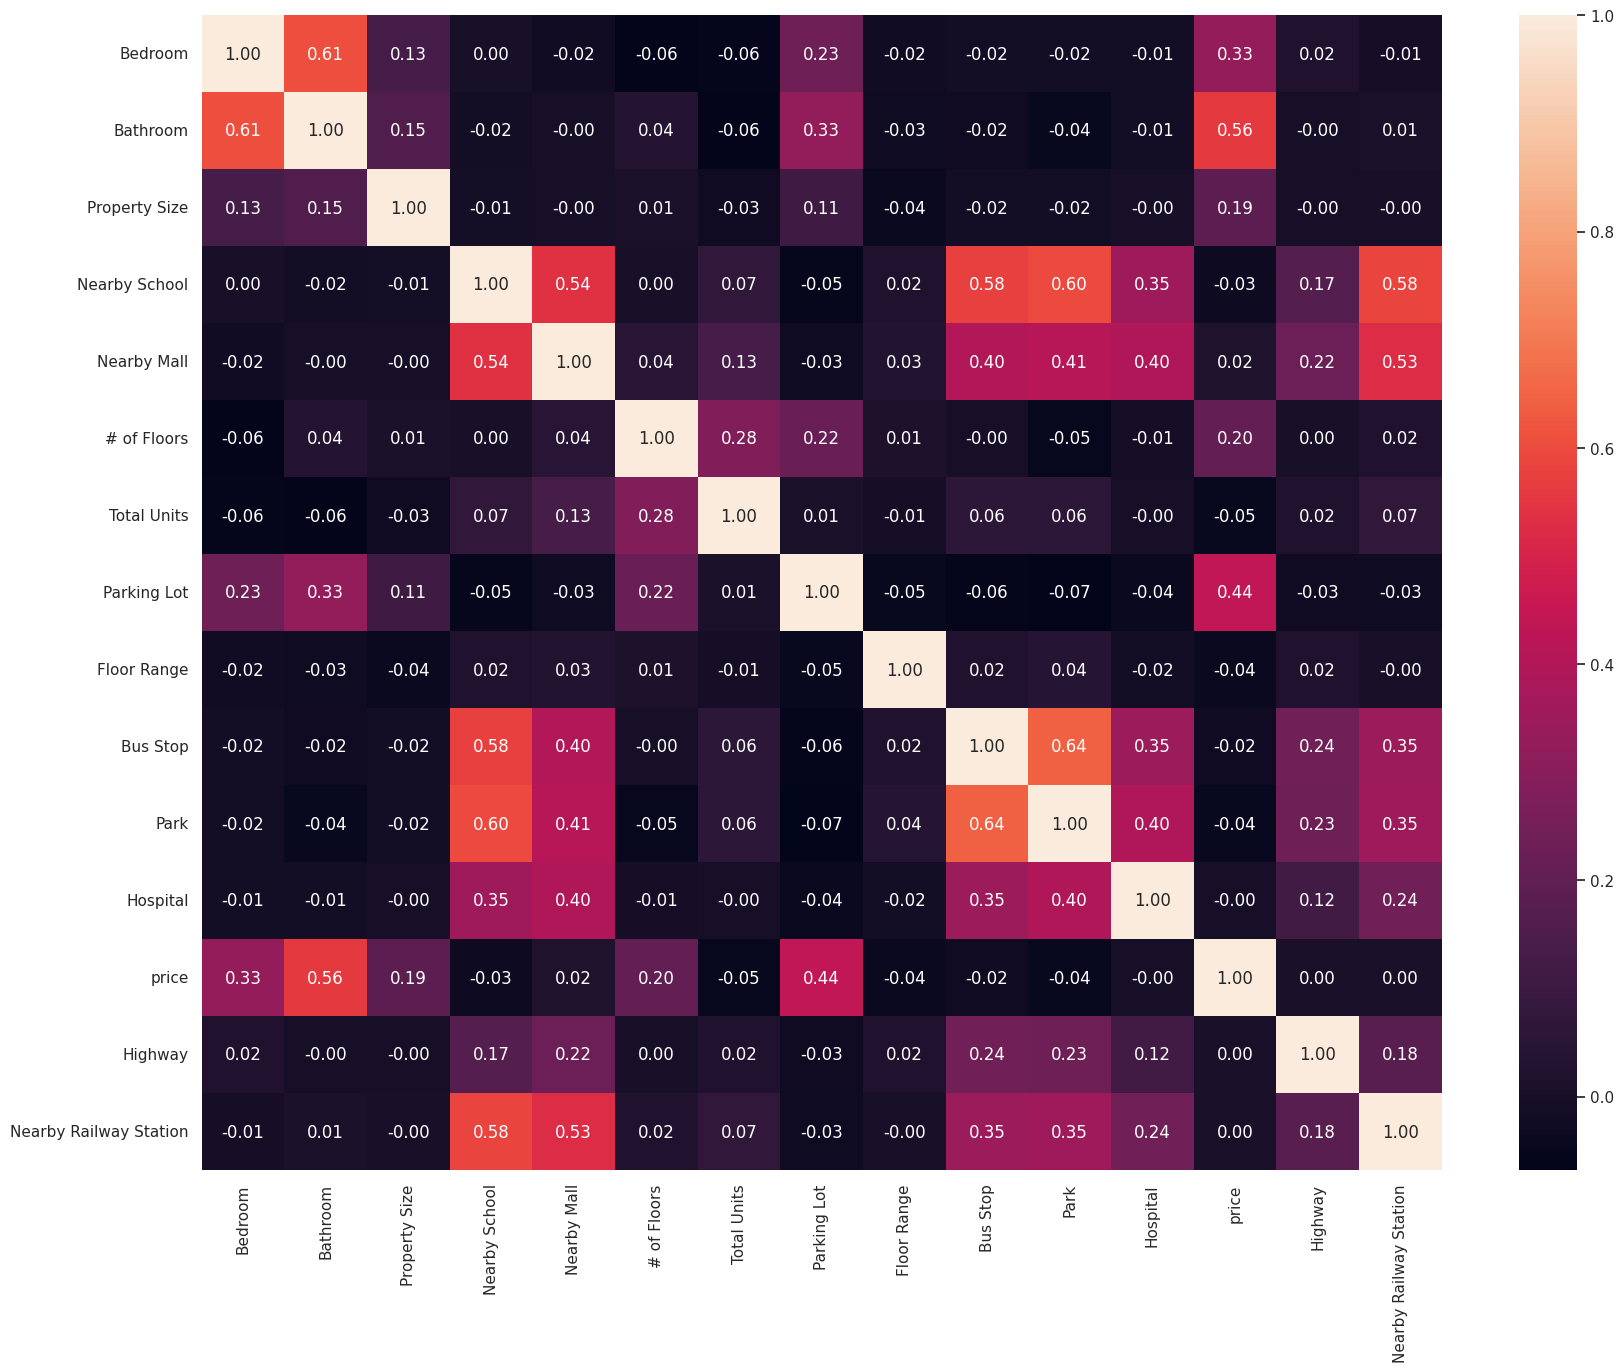

Highly correlated features (threshold > 0.7):
[]


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Find features with correlation higher than a threshold
threshold = 0.7
high_corr = np.where(abs(corr_matrix) > threshold)
high_corr = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

print("Highly correlated features (threshold > 0.7):")
print(high_corr)

One-Hot Encoding 

Performing one-hot encoding with explicit columns make sure that categorical variables like 'State', 'Tenure Type', 'Property Type', and 'Land Title' are converted into a format suitable for machine learning models.

In [35]:
# Perform one-hot encoding with explicit columns to include 'Freehold' and 'Bumi Lot'
columns_to_encode = ['State', 'Tenure Type', 'Property Type', 'Land Title']

df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)

# Ensure 'Freehold' and 'Bumi Lot' are included
df_encoded['Tenure Type_Freehold'] = df['Tenure Type'].apply(lambda x: 1 if x == 'Freehold' else 0)
df_encoded['Land Title_Bumi Lot'] = df['Land Title'].apply(lambda x: 1 if x == 'Bumi Lot' else 0)
df_encoded['Land Title_Bumi Lot'] = df['Land Title'].apply(lambda x: 1 if x == 'Bumi Lot' else 0)

# Print first few rows to verify encoding
print(df_encoded.head())


   Bedroom  Bathroom  Property Size  Nearby School  Nearby Mall  # of Floors  \
0        4         2         1000.0              1            1         20.0   
1        3         2          980.0              0            0         20.0   
2        3         2         1000.0              0            0         13.0   
3        3         1          592.0              0            0         20.0   
4        1         1          467.0              1            1         43.0   

   Total Units  Parking Lot  Floor Range  Bus Stop  ...  Property Type_Duplex  \
0          462            2            3         1  ...                     0   
1          462            1            1         0  ...                     0   
2          445            1            2         0  ...                     0   
3          462            1            3         0  ...                     0   
4          956            1            1         1  ...                     0   

   Property Type_Flat  Property 

In [36]:
df_encoded.head()

,Bedroom,Bathroom,Property Size,Nearby School,Nearby Mall,# of Floors,Total Units,Parking Lot,Floor Range,Bus Stop,...,Property Type_Duplex,Property Type_Flat,Property Type_Others,Property Type_Service Residence,Property Type_Studio,Property Type_Townhouse Condo,Land Title_Malay Reserved,Land Title_Non Bumi Lot,Tenure Type_Freehold,Land Title_Bumi Lot
0,4,2,1000.0,1,1,20.0,462,2,3,1,...,0,0,0,1,0,0,0,1,1,0
1,3,2,980.0,0,0,20.0,462,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,3,2,1000.0,0,0,13.0,445,1,2,0,...,0,0,0,0,0,0,0,1,1,0
3,3,1,592.0,0,0,20.0,462,1,3,0,...,0,1,0,0,0,0,0,1,0,0
4,1,1,467.0,1,1,43.0,956,1,1,1,...,0,0,0,0,1,0,0,0,1,1


In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 0 to 3999
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bedroom                          3993 non-null   int64  
 1   Bathroom                         3993 non-null   int64  
 2   Property Size                    3993 non-null   float64
 3   Nearby School                    3993 non-null   int64  
 4   Nearby Mall                      3993 non-null   int64  
 5   # of Floors                      3993 non-null   float64
 6   Total Units                      3993 non-null   int64  
 7   Parking Lot                      3993 non-null   int64  
 8   Floor Range                      3993 non-null   int64  
 9   Bus Stop                         3993 non-null   int64  
 10  Park                             3993 non-null   int64  
 11  Hospital                         3993 non-null   int64  
 12  price                    

Great! We have successfully converted all string data into numerical format for Principal Component Analysis (PCA), Feature Engineering and Machine Learning Model Implementation. 

# PRINCIPAL COMPONENT ANALYSIS (PCA)

After balancing the data, we will use PCA to reduce the number of features while keeping most of the important information.

In [38]:
# Split data into features and target
X = df_encoded.drop(columns=['price'])  # Drop the target column
y = df_encoded['price']  # Target column

## STEP 1

PCA is sensitive to the scale of features, so it's essential to standardize the data before applying PCA.

In [39]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
#scaler = StandardScaler()

# Fit and transform on the data
#Z = scaler.fit_transform(df_encoded)

In [40]:
# Calculate mean and standard deviation
xbar = X.mean(axis=0)
sigma = X.std(axis=0, ddof=1) 
# Standardize the data
Z = (X - xbar) / sigma

## STEP 2

In [41]:
#PCA uses the covariance matrix to understand how variables are related to each other.
# Compute the covariance matrix
cov_matrix = np.cov(Z, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.00000000e+00  6.05043132e-01  1.28396005e-01 ... -2.22245027e-02
   2.39943872e-02  1.96969295e-02]
 [ 6.05043132e-01  1.00000000e+00  1.54504845e-01 ...  6.71073166e-02
   7.94144138e-02 -6.95366498e-02]
 [ 1.28396005e-01  1.54504845e-01  1.00000000e+00 ...  2.79142813e-02
  -7.63535010e-04 -2.90041061e-02]
 ...
 [-2.22245027e-02  6.71073166e-02  2.79142813e-02 ...  1.00000000e+00
   2.10045446e-01 -9.92518451e-01]
 [ 2.39943872e-02  7.94144138e-02 -7.63535010e-04 ...  2.10045446e-01
   1.00000000e+00 -2.11338650e-01]
 [ 1.96969295e-02 -6.95366498e-02 -2.90041061e-02 ... -9.92518451e-01
  -2.11338650e-01  1.00000000e+00]]


## STEP 3

Calculate the eigenvectors and eigenvalues

In [42]:
# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print eigenvalues
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 4.17300075e+00  2.80946766e+00  2.11881208e+00  1.91921432e+00
  1.50884152e+00  1.38450906e-01  3.06800501e-01  3.20988354e-01
  3.43736944e-01  4.06080722e-01  4.42183499e-01  1.33920405e+00
  1.28946271e+00  5.60988155e-01  6.03715523e-01  6.78557842e-01
  7.20366670e-01  7.50037836e-01  1.15097076e+00  1.14359927e+00
  7.96033113e-01  1.11823019e+00  8.28397309e-01  8.35146628e-01
  8.83856416e-01  9.00518948e-01  9.22379231e-01  1.06086581e+00
  9.44709032e-01  1.03641601e+00  9.58927232e-01  9.77603565e-01
  9.91560351e-01  9.98941968e-01  1.00171793e+00  1.00288156e+00
  1.00881781e+00  1.00851684e+00  3.09525619e-15 -2.71556222e-17]

Eigenvectors:
[[ 4.21131833e-02  1.43244994e-01 -4.91510581e-01 ...  1.61365379e-03
  -9.62671621e-17  4.20124331e-17]
 [ 6.79283741e-02  2.18964891e-01 -4.48352667e-01 ...  3.01233104e-02
   1.39967653e-16 -1.69117674e-16]
 [ 2.49353262e-02  6.62747142e-02 -1.65790484e-01 ...  8.02727101e-02
   9.58630304e-17  1.99570663e-16]
 ...
 

## STEP 4

Sort eigenvalues in descending order and compute the Principal Components

In [43]:
# Sort eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Print eigenvalues in descending order
print("Print Eigenvalues in Descending Order:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue:.4f}")

Print Eigenvalues in Descending Order:
Eigenvalue 1: 4.1730
Eigenvalue 2: 2.8095
Eigenvalue 3: 2.1188
Eigenvalue 4: 1.9192
Eigenvalue 5: 1.5088
Eigenvalue 6: 1.3392
Eigenvalue 7: 1.2895
Eigenvalue 8: 1.1510
Eigenvalue 9: 1.1436
Eigenvalue 10: 1.1182
Eigenvalue 11: 1.0609
Eigenvalue 12: 1.0364
Eigenvalue 13: 1.0088
Eigenvalue 14: 1.0085
Eigenvalue 15: 1.0029
Eigenvalue 16: 1.0017
Eigenvalue 17: 0.9989
Eigenvalue 18: 0.9916
Eigenvalue 19: 0.9776
Eigenvalue 20: 0.9589
Eigenvalue 21: 0.9447
Eigenvalue 22: 0.9224
Eigenvalue 23: 0.9005
Eigenvalue 24: 0.8839
Eigenvalue 25: 0.8351
Eigenvalue 26: 0.8284
Eigenvalue 27: 0.7960
Eigenvalue 28: 0.7500
Eigenvalue 29: 0.7204
Eigenvalue 30: 0.6786
Eigenvalue 31: 0.6037
Eigenvalue 32: 0.5610
Eigenvalue 33: 0.4422
Eigenvalue 34: 0.4061
Eigenvalue 35: 0.3437
Eigenvalue 36: 0.3210
Eigenvalue 37: 0.3068
Eigenvalue 38: 0.1385
Eigenvalue 39: 0.0000
Eigenvalue 40: -0.0000


## STEP 5

Reduce the dimensions of the data set: To begin, the graph below will visualize the explained variance by principal components, which helps us decide the number of components (n_components) to use for reducing the dimensionality of our data with PCA. Also, the plot below is where we use a form of the elbow method to determine the number of principal components (n_components) for dimensionality reduction using PCA.

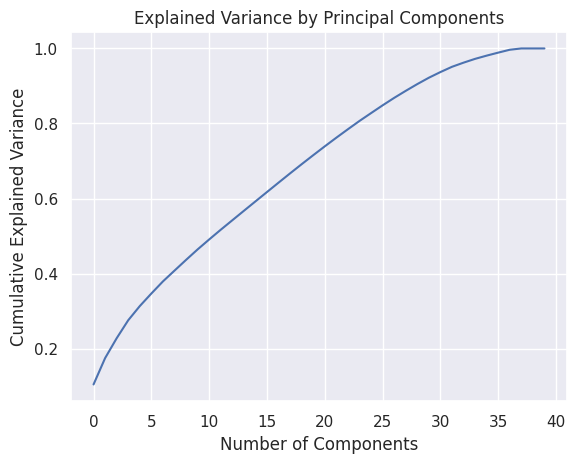

Cumulative Explained Variance Ratios:
Component 1: 0.104
Component 2: 0.175
Component 3: 0.228
Component 4: 0.276
Component 5: 0.313
Component 6: 0.347
Component 7: 0.379
Component 8: 0.408
Component 9: 0.436
Component 10: 0.464
Component 11: 0.491
Component 12: 0.517
Component 13: 0.542
Component 14: 0.567
Component 15: 0.592
Component 16: 0.617
Component 17: 0.642
Component 18: 0.667
Component 19: 0.691
Component 20: 0.715
Component 21: 0.739
Component 22: 0.762
Component 23: 0.785
Component 24: 0.807
Component 25: 0.828
Component 26: 0.848
Component 27: 0.868
Component 28: 0.887
Component 29: 0.905
Component 30: 0.922
Component 31: 0.937
Component 32: 0.951
Component 33: 0.962
Component 34: 0.972
Component 35: 0.981
Component 36: 0.989
Component 37: 0.997
Component 38: 1.000
Component 39: 1.000
Component 40: 1.000


In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Compute PCA
pca = PCA().fit(Z)

# Plot explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Print cumulative explained variance ratios
print("Cumulative Explained Variance Ratios:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Component {i+1}: {ratio:.3f}")

Based on the plot, determine the number of principal components (n_components) . This decision can be guided by the point where the explained variance curve starts to flatten out (elbow point). Use the selected number of components to transform original data (Z) into the reduced-dimensional space.

## STEP 6

There are two approaches in performing PCA:

So, from the plot and number of component analysis, we decided to choose 25 components 

Choosing 25 components means we are keeping 82.2% of the important information from the original data. By picking 25, we balance between making the calculations faster and keeping enough useful information.

In [45]:
n_components = 25 # so this is selected number of components to transform original data (Z) into the reduced-dimensional space.

- Approach 1: Compute Principal Component Using Eigenvectors from previous PCA Analysis

In [46]:
# Compute principal components
principal_components = Z.dot(eigenvectors[:, :n_components])

# Transform the data using the selected eigenvector subset
transformed = Z.dot(eigenvectors[:, :n_components])

# Print the shape of transformed data
print("Shape of transformed data:", transformed.shape)

# Print the first few rows of transformed data
print("Transformed data:")
print(transformed)

Shape of transformed data: (3993, 25)
Transformed data:
            0         1         2         3         4         5         6   \
0    -4.359551  3.556817  0.631269  0.192399 -0.159415 -0.828994 -0.549633   
1     1.487086 -0.194731  1.251227  0.143279 -0.406296 -0.787024 -1.475481   
2     0.052389 -0.046813  0.065818  1.864581  1.580855 -0.977794 -0.918333   
3    -0.002883 -2.628180  1.292311 -0.173129  1.446293  0.007995  0.179180   
4    -5.528291 -0.427620  3.555734  4.075875 -1.550116  0.724627  0.753718   
...        ...       ...       ...       ...       ...       ...       ...   
3995  2.202888  1.754828 -0.126624  0.028604 -0.836503  0.766735  0.480863   
3996  1.893851  0.665816  0.626391  0.548092 -0.307204  0.308055  0.338786   
3997  1.391614  0.582600 -0.100194  0.392643  0.286686  0.110120  0.340763   
3998  0.838025  2.749302 -0.035120 -1.055667 -3.012742 -0.750985 -1.987764   
3999 -0.171217  0.282334  0.401041  1.354349  0.815367 -0.767875 -0.897549   

       

- Approach 2: Compute Principal Components Using sklearn's PCA

In [47]:
# Compute PCA with the selected number of components using sklearn's PCA
pca = PCA(n_components=n_components).fit(Z)

# Transform the data to the reduced-dimensional space
Z_pca = pca.transform(Z)

# Print shapes
print("Shape of Original Data (Z):", Z.shape)
print("Shape of Transformed Data (Z_pca):", Z_pca.shape)

# Print both
print("Original Data (Z):")
print(Z)

print("\nTransformed Data (Z_pca):")
print(Z_pca)

# Combine PCA-transformed features with the target variable
df_pca = pd.DataFrame(Z_pca)
df_pca['price'] = y.values

Shape of Original Data (Z): (3993, 40)
Shape of Transformed Data (Z_pca): (3993, 25)
Original Data (Z):
       Bedroom  Bathroom  Property Size  Nearby School  Nearby Mall  \
0     1.564044 -0.032565      -0.017507       2.195334     3.157100   
1     0.119058 -0.032565      -0.027438      -0.455397    -0.316667   
2     0.119058 -0.032565      -0.017507      -0.455397    -0.316667   
3     0.119058 -1.678564      -0.220090      -0.455397    -0.316667   
4    -2.770913 -1.678564      -0.282156       2.195334     3.157100   
...        ...       ...            ...            ...          ...   
3995  0.119058 -0.032565       0.101163      -0.455397    -0.316667   
3996  0.119058 -0.032565      -0.091986      -0.455397    -0.316667   
3997  0.119058 -0.032565       0.410499      -0.455397    -0.316667   
3998  1.564044  1.613433       0.131451      -0.455397    -0.316667   
3999  0.119058 -0.032565      -0.087021      -0.455397     3.157100   

      # of Floors  Total Units  Parking Lot

Conclusion: Now, PCA has transform the cleaned dataset 'df_encoded' into a lower-dimensional space df_pca. We have to use 'df_pca' as input for training the machine learning model. 

# MACHINE LEARNING MODEL IMPLEMENTATION

In this section, we will compare the performance of our model when using Principal Component Analysis (PCA) against when PCA is not applied. This comparison will help us understand the impact of dimensionality reduction on our model's performance.

Without PCA:

Data splitting is the process of dividing the dataset into separate sets to train and evaluate the performance of the model. Here we will use 'df_encoded' variable, which DOES NOT CONTAIN the data after dimensionality reduction using PCA.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split into train and test sets
df_train_nopca, df_test_nopca = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on training data
df_train_scaled_nopca = scaler.fit_transform(df_train_nopca)
df_test_scaled_nopca = scaler.transform(df_test_nopca)

# Convert back to DataFrames if needed
df_train_scaled_nopca = pd.DataFrame(df_train_scaled_nopca, columns=df_train_nopca.columns)
df_test_scaled_nopca = pd.DataFrame(df_test_scaled_nopca, columns=df_test_nopca.columns)

# Optionally, if you want to check the shapes after scaling
print(f"df_train_scaled shape: {df_train_scaled_nopca.shape}")
print(f"df_test_scaled shape: {df_test_scaled_nopca.shape}")

y_train_nopca = df_train_scaled_nopca['price']
y_test_nopca = df_test_scaled_nopca['price']

X_train_nopca = df_train_scaled_nopca.drop('price', axis=1)
X_test_nopca = df_test_scaled_nopca.drop('price', axis=1)

df_train_scaled shape: (3194, 41)
df_test_scaled shape: (799, 41)


With PCA:

Data splitting is the process of dividing the dataset into separate sets to train and evaluate the performance of the model. Here we will use 'df_pca' variable, which CONTAINS the data after dimensionality reduction using PCA.


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split into train and test sets
df_train, df_test = train_test_split(df_pca, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on training data
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

# Convert back to DataFrames if needed
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns)

# Optionally, if you want to check the shapes after scaling
print(f"df_train_scaled shape: {df_train_scaled.shape}")
print(f"df_test_scaled shape: {df_test_scaled.shape}")

df_train_scaled shape: (3194, 26)
df_test_scaled shape: (799, 26)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
y_train = df_train_scaled['price']
y_test = df_test_scaled['price']

X_train = df_train_scaled.drop('price', axis=1)
X_test = df_test_scaled.drop('price', axis=1)

Finally, using the cleaned/preprocessed data, we will develop and evaluate predictive models using techniques such as Linear Regression and Neural Networks.

## Linear Regression

In [51]:
#Linear Regression without PCA---------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_nopca, y_train_nopca)

# Predict on the test data
y_pred_nopca = model.predict(X_test_nopca)

# Evaluate the model
rmse_lr_nopca = mean_squared_error(y_test_nopca, y_pred_nopca, squared=False)
print("Linear Regression")
print(f"NON-PCA Root Mean Squared Error (RMSE): {rmse_lr_nopca}")

#Linear Regression with PCA---------------------------------------------------------

# Initialize the model
modelPCA = LinearRegression()

# Fit the model on the training data
modelPCA.fit(X_train, y_train)

# Predict on the test data
y_pred = modelPCA.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"PCA Root Mean Squared Error (RMSE): {rmse}")

Linear Regression
NON-PCA Root Mean Squared Error (RMSE): 0.6140927341389399
PCA Root Mean Squared Error (RMSE): 0.6091159520575952


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2_lr = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2_lr}")

R-squared (R²) Score: 0.4631204466654312


## Neural Network

In [59]:
#Neural Network without PCA---------------------------------------------------------
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
nn_model = MLPRegressor()

# Fit the model on the training data
nn_model.fit(X_train_nopca, y_train_nopca)

# Predict on the test data
y_pred_nn = nn_model.predict(X_test_nopca)

# Evaluate the model
rmse_nn = mean_squared_error(y_test_nopca, y_pred_nn, squared=False)
print("Neural Network")
print(f"NON-PCA Root Mean Squared Error (RMSE): {rmse_nn}")

#Neural Network without PCA---------------------------------------------------------

# Initialize the model
nn_modelPCA = MLPRegressor()

# Fit the model on the training data
nn_modelPCA.fit(X_train, y_train)

# Predict on the test data
y_pred_nn_PCA = nn_modelPCA.predict(X_test)

# Evaluate the model
PCA_rmse_nn = mean_squared_error(y_test, y_pred_nn_PCA, squared=False)
print(f"PCA Root Mean Squared Error (RMSE): {PCA_rmse_nn}")

Neural Network
NON-PCA Root Mean Squared Error (RMSE): 0.4492396393375835
PCA Root Mean Squared Error (RMSE): 0.49013359297383713


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

r2_nn = r2_score(y_test, y_pred_nn)
print(f"R-squared (R²) Score: {r2_nn}")

R-squared (R²) Score: 0.6880677564516169


# MODEL COMPARISON AND EVALUATION

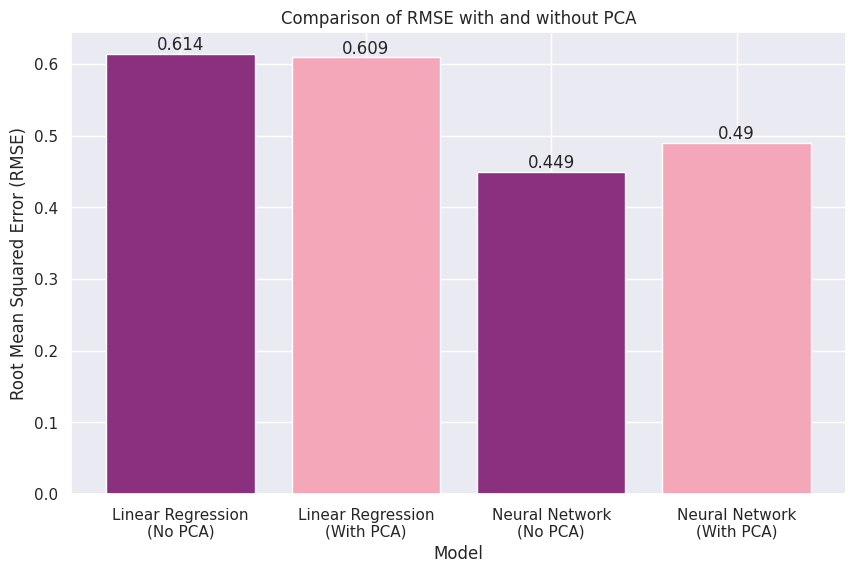

In [60]:
import matplotlib.pyplot as plt

# RMSE values for the models
rmse_values = {
    "Linear Regression\n(No PCA)": 0.614019424153834,
    "Linear Regression\n(With PCA)": 0.6091132293169387,
    "Neural Network\n(No PCA)": 0.4492396393375835,
    "Neural Network\n(With PCA)": 0.49013359297383713,
}

# Extract labels and RMSE values
labels = list(rmse_values.keys())
rmse = list(rmse_values.values())

# Define colors for the bars
colors = ['#8a307f', '#f4a7b9', '#8a307f', '#f4a7b9']  # Purple and soft pink

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, rmse, color=colors)

# Add title and labels
plt.title('Comparison of RMSE with and without PCA')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')

# Add RMSE values on top of the bars
for bar, value in zip(bars, rmse):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(value, 3), ha='center', va='bottom')

# Show plot
plt.show()


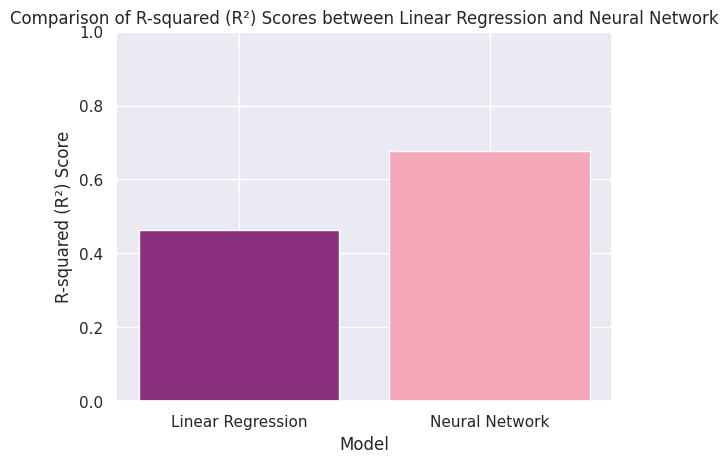

In [56]:
import matplotlib.pyplot as plt

# Define the R-squared scores
r2_scores = {
    'Linear Regression': 0.46255215313347187,
    'Neural Network': 0.6770842255800154
}

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(r2_scores.keys(), r2_scores.values(), color=['#8a307f', '#f4a7b9'])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('R-squared (R²) Score')
ax.set_title('Comparison of R-squared (R²) Scores between Linear Regression and Neural Network')

# Set the y-axis limit to range from 0 to 1 for better comparison
plt.ylim(0, 1)

# Show the bar chart
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=053bd99b-4694-4df3-8c9c-5bf48833c0b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>